In [65]:
from PIL import Image, ImageDraw
from surya.detection import batch_text_detection
from surya.layout import batch_layout_detection
from surya.model.detection.model import load_model as load_det_model, load_processor as load_det_processor
from surya.model.layout.model import load_model as load_layout_model
from surya.model.layout.processor import load_processor as load_layout_processor
image = Image.open('example.png')

In [33]:
model = load_layout_model()
processor = load_layout_processor()
det_model = load_det_model()
det_processor = load_det_processor()

# layout_predictions is a list of dicts, one per image
line_predictions = batch_text_detection([image], det_model, det_processor)
layout_predictions = batch_layout_detection([image], model, processor, line_predictions)

Loaded layout model datalab-to/surya_layout0 on device cuda with dtype torch.float16
Loaded detection model vikp/surya_det3 on device cuda with dtype torch.float16


Recognizing layout: 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


In [42]:
line_predictions = batch_text_detection([image], det_model, det_processor)
layout_predictions = batch_layout_detection([image], model, processor, line_predictions)

Recognizing layout: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


In [66]:
draw = ImageDraw.Draw(image, "RGBA")
colors = {
    'Text': (30,144,255),
    'Equation': (220,20,60),
    'TextInlineMath': (255,105,180)
}
for box in layout_predictions[0].bboxes:
    bbox = box.bbox
    draw.rectangle(bbox, outline=colors[box.label]+(255,), fill=colors[box.label]+(50,))
    draw.text((bbox[0], bbox[1]-28), box.label, fill='red', font_size=25)

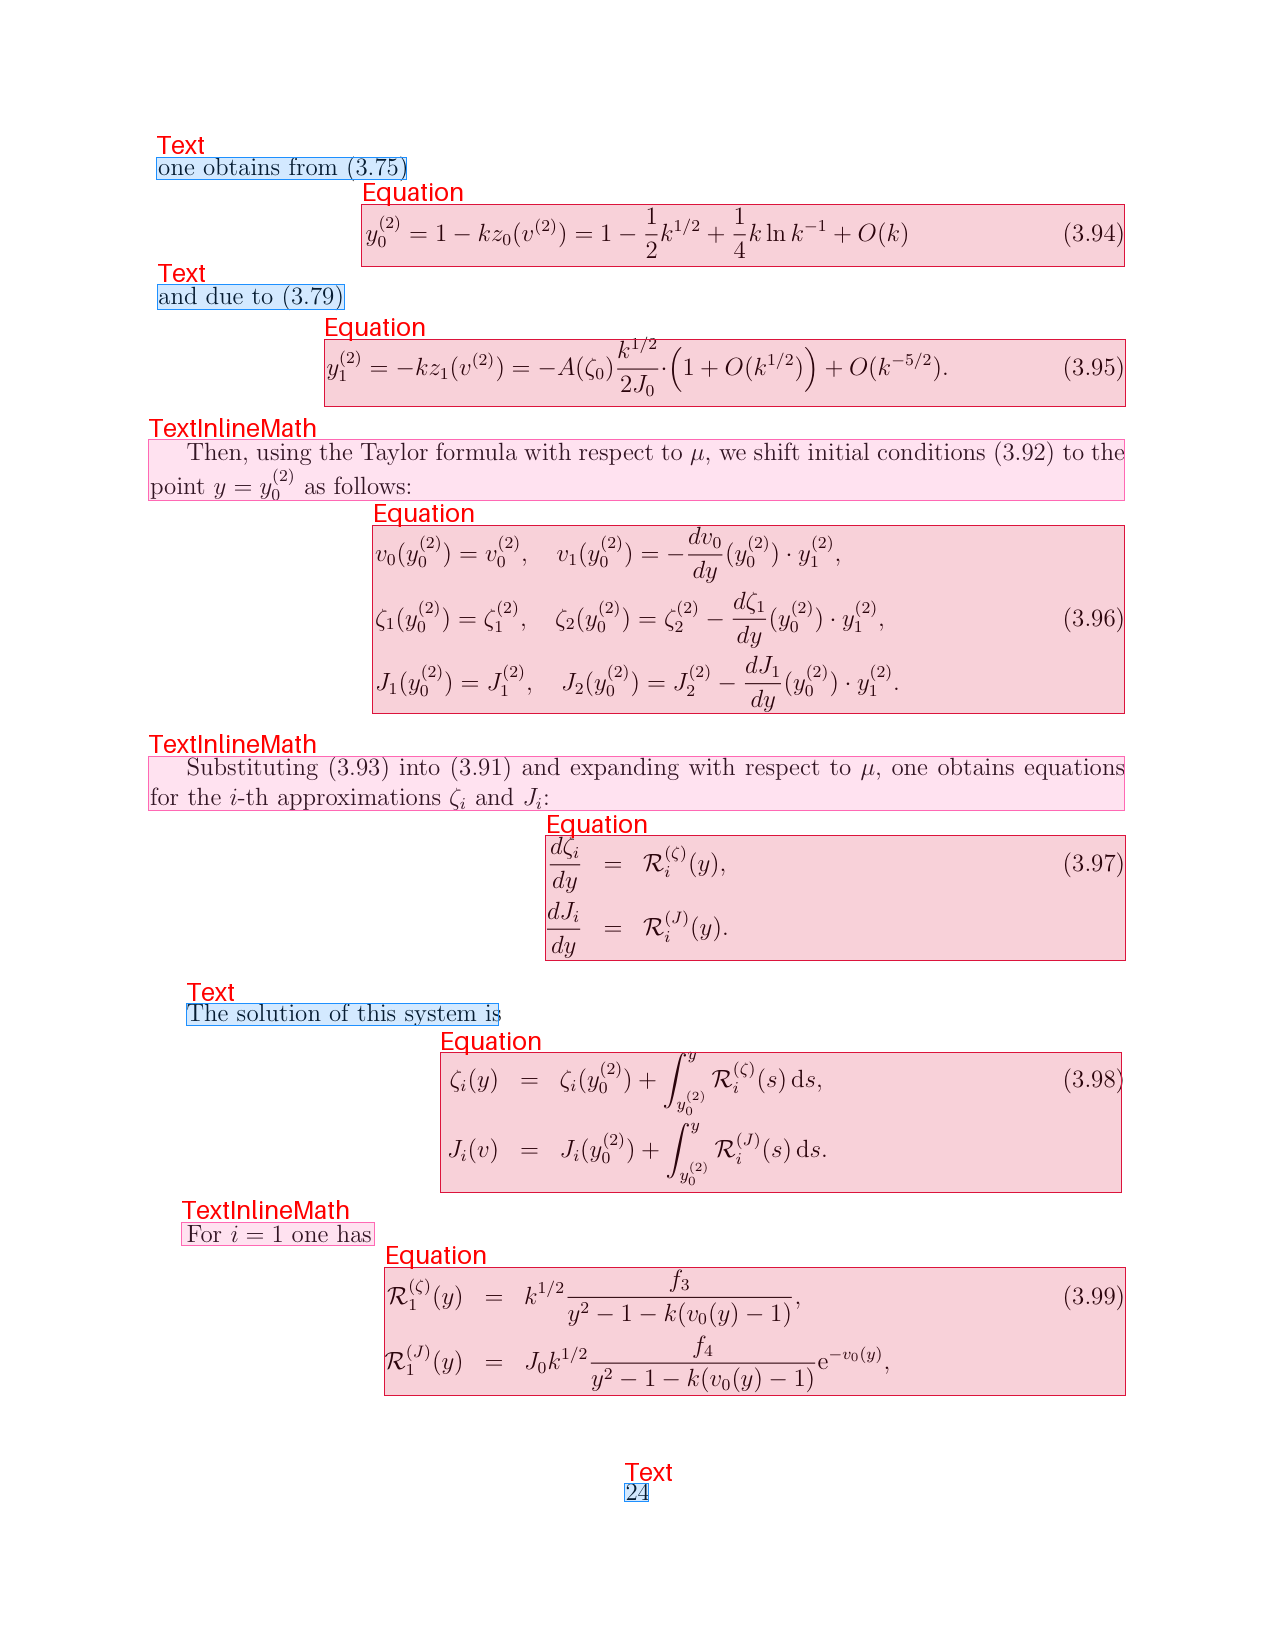

In [67]:
image